In [17]:
# imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys

from dreem_tools import plotting, parse

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [52]:
# style functions
def publication_style_ax(ax):
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)
    fsize = 24
    ax.xaxis.label.set_fontsize(fsize)
    ax.yaxis.label.set_fontsize(fsize)
    ax.tick_params(axis='both', which='major', labelsize=fsize-2)


In [3]:
script_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts', 'analysis'))
sys.path.append(script_dir)


In [4]:
from titration_fitting import fit_bootstrap, curve_func_new 


hacky now maybe come up with a different system?

In [5]:
df = pd.read_json("../data/wt_mg_titra.json")


### buffer vs gaaa reactivity

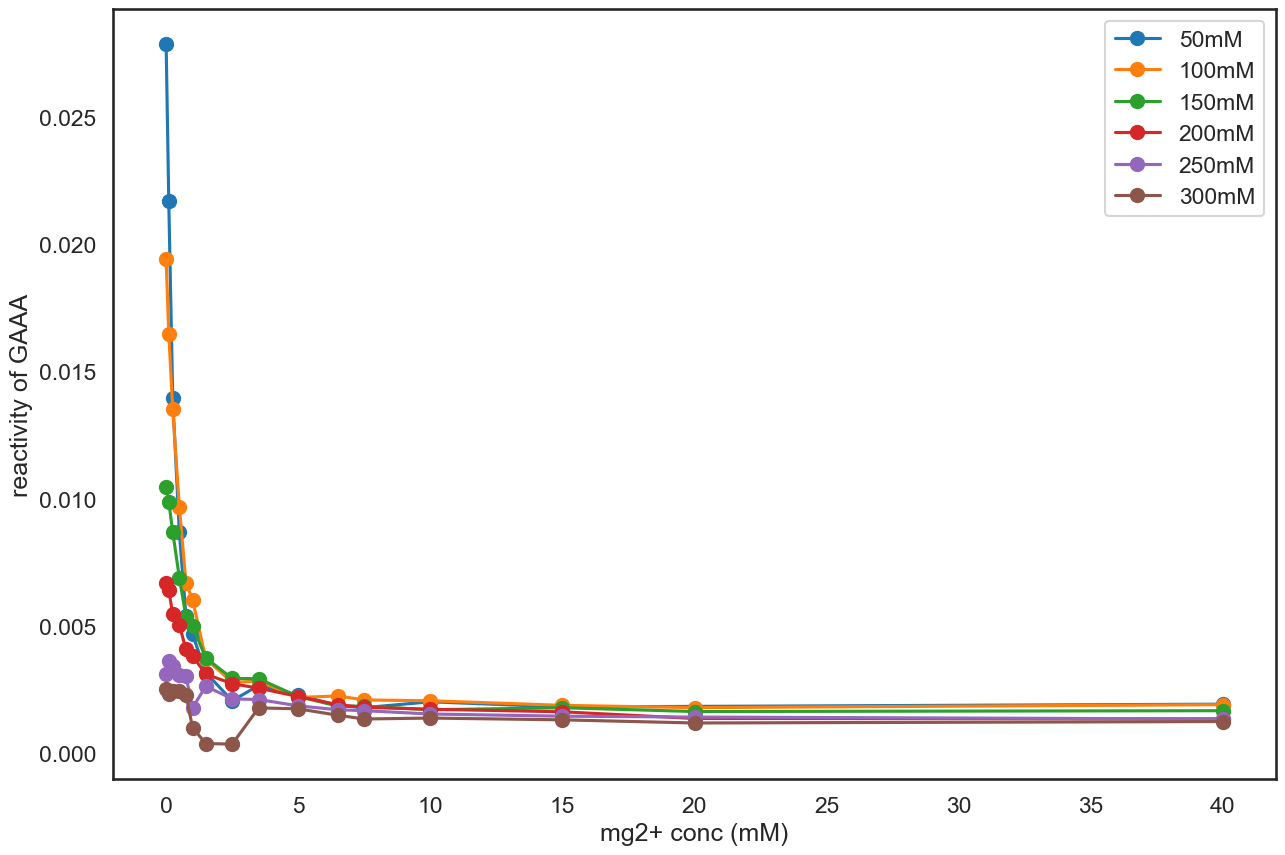

In [6]:
exp_names = [
    ["2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM", "50mM"],
    ["2022_07_28_C0117_100mM_NaC_Mg_titra_CM", "100mM"],
    ["2022_07_29_C0117_150mM_NaC_Mg_titra_CM", "150mM"],
    ["2022_08_08_C0117_200mM_NaC_Mg_titra_CM", "200mM"],
    ["2022_08_09_C0117_250mM_NaC_Mg_titra_CM", "250mM"],
    ["2022_08_10_C0117_300mM_NaC_Mg_titra_CM", "300mM"],
]

for exp in exp_names:
    df_sub = df[df["exp_name"] == exp[0]]
    plt.plot(df_sub["mg_conc"], df_sub["gaaa_avg"], label=exp[1], marker="o", ms=10)
plt.ylabel("reactivity of GAAA")
plt.xlabel("mg2+ conc (mM)")
plt.legend()

Currently 2.5 mM and 1.5 mM for 300 mM is messed up need to rerun

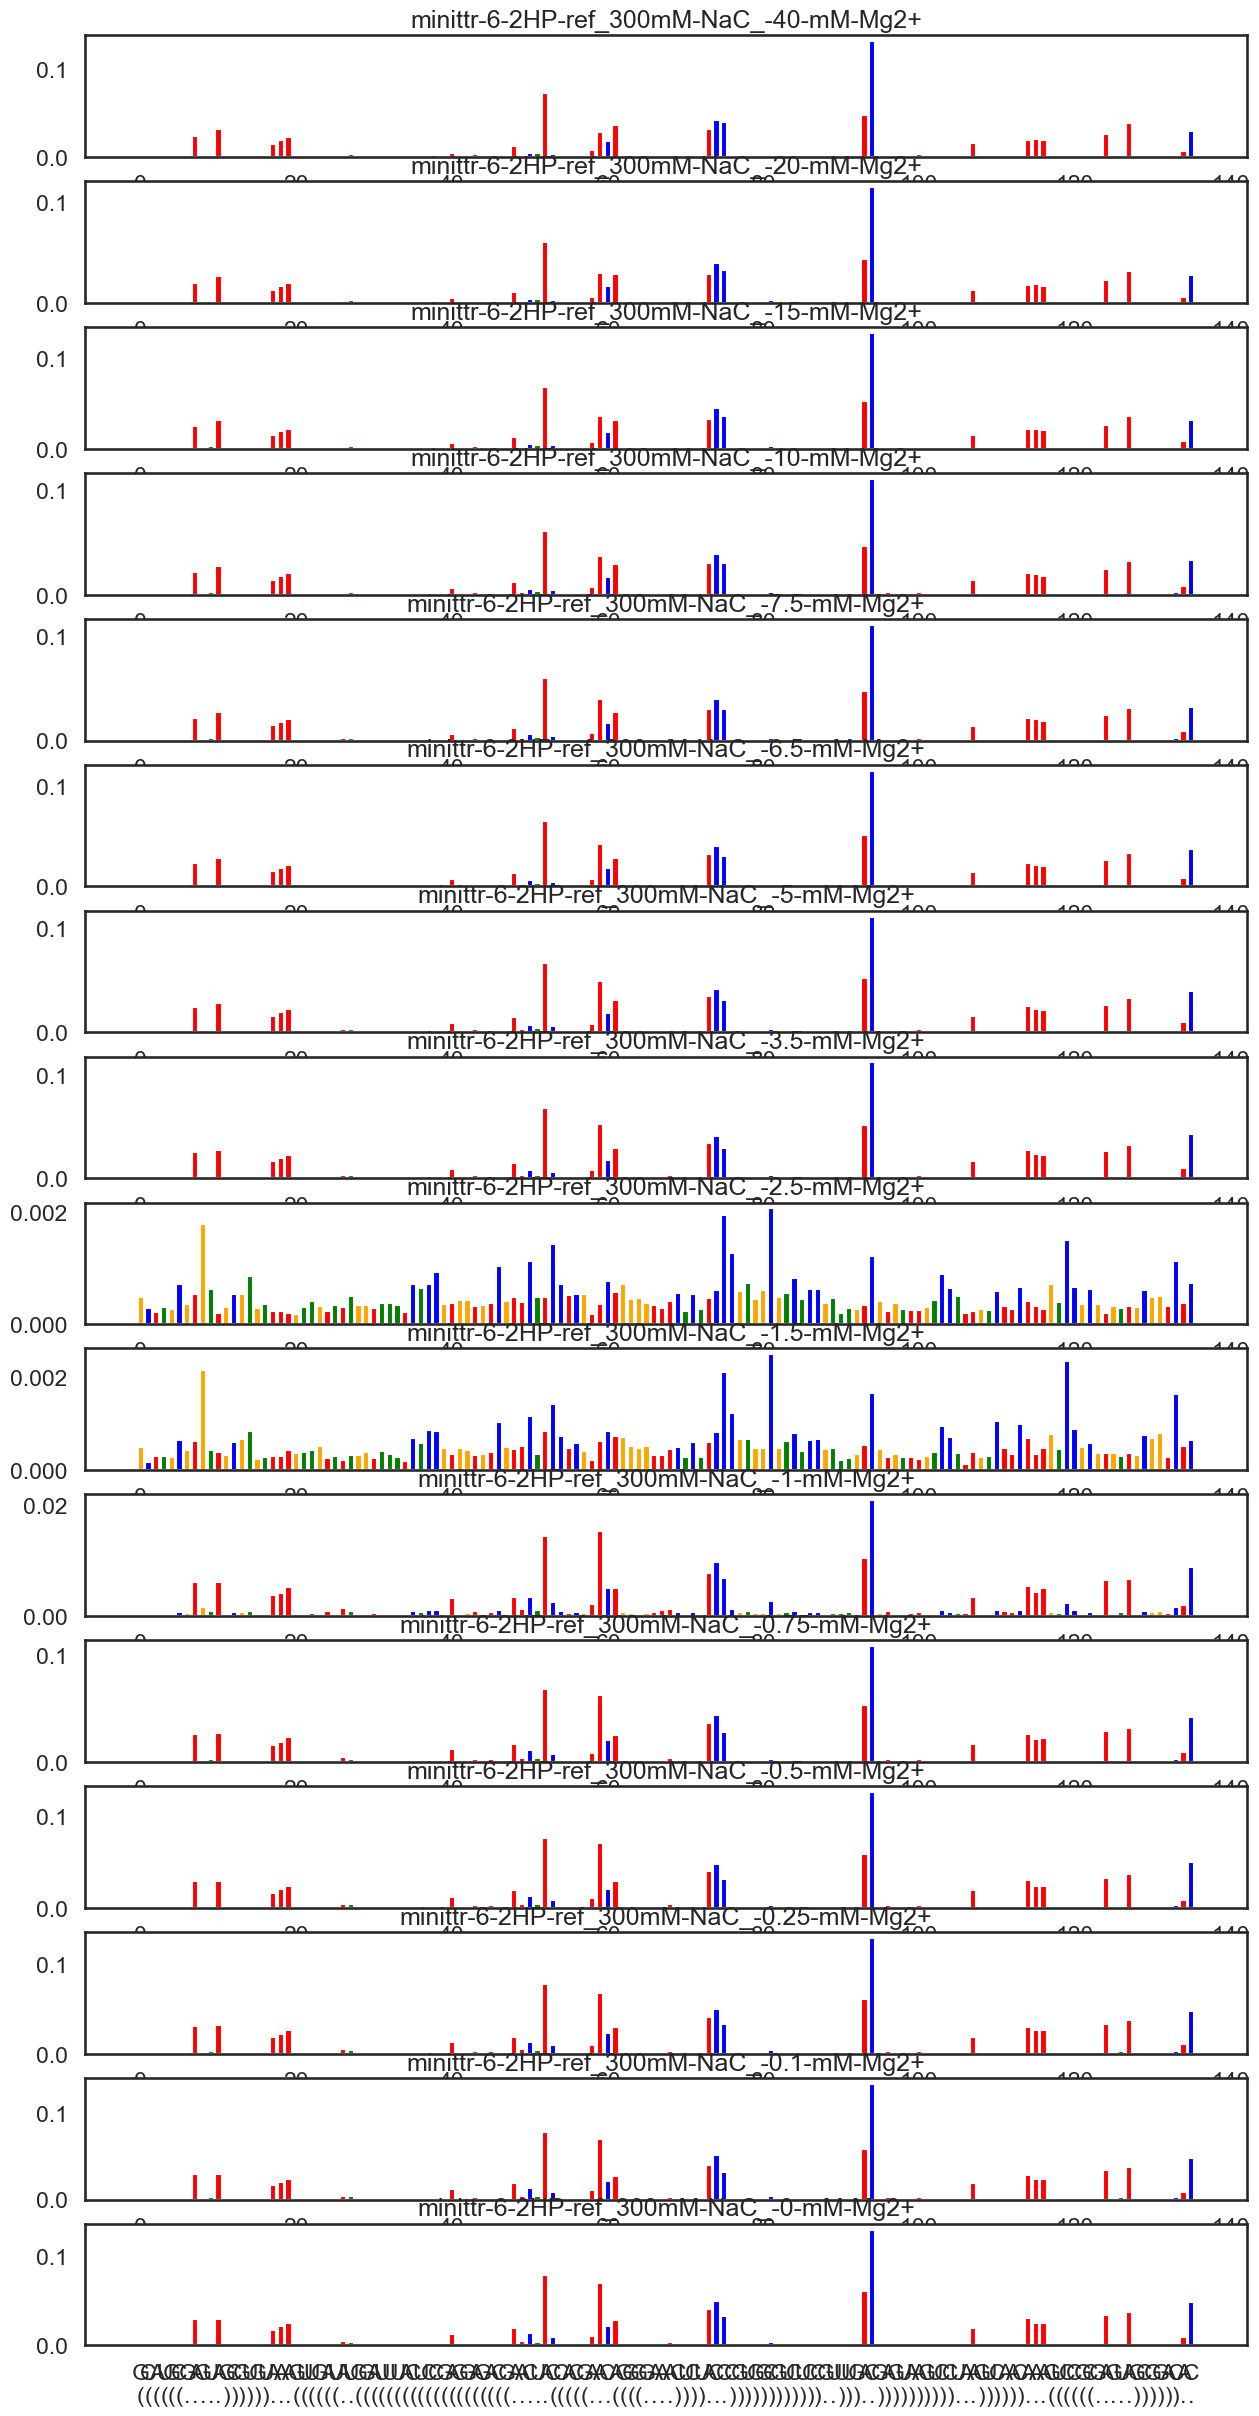

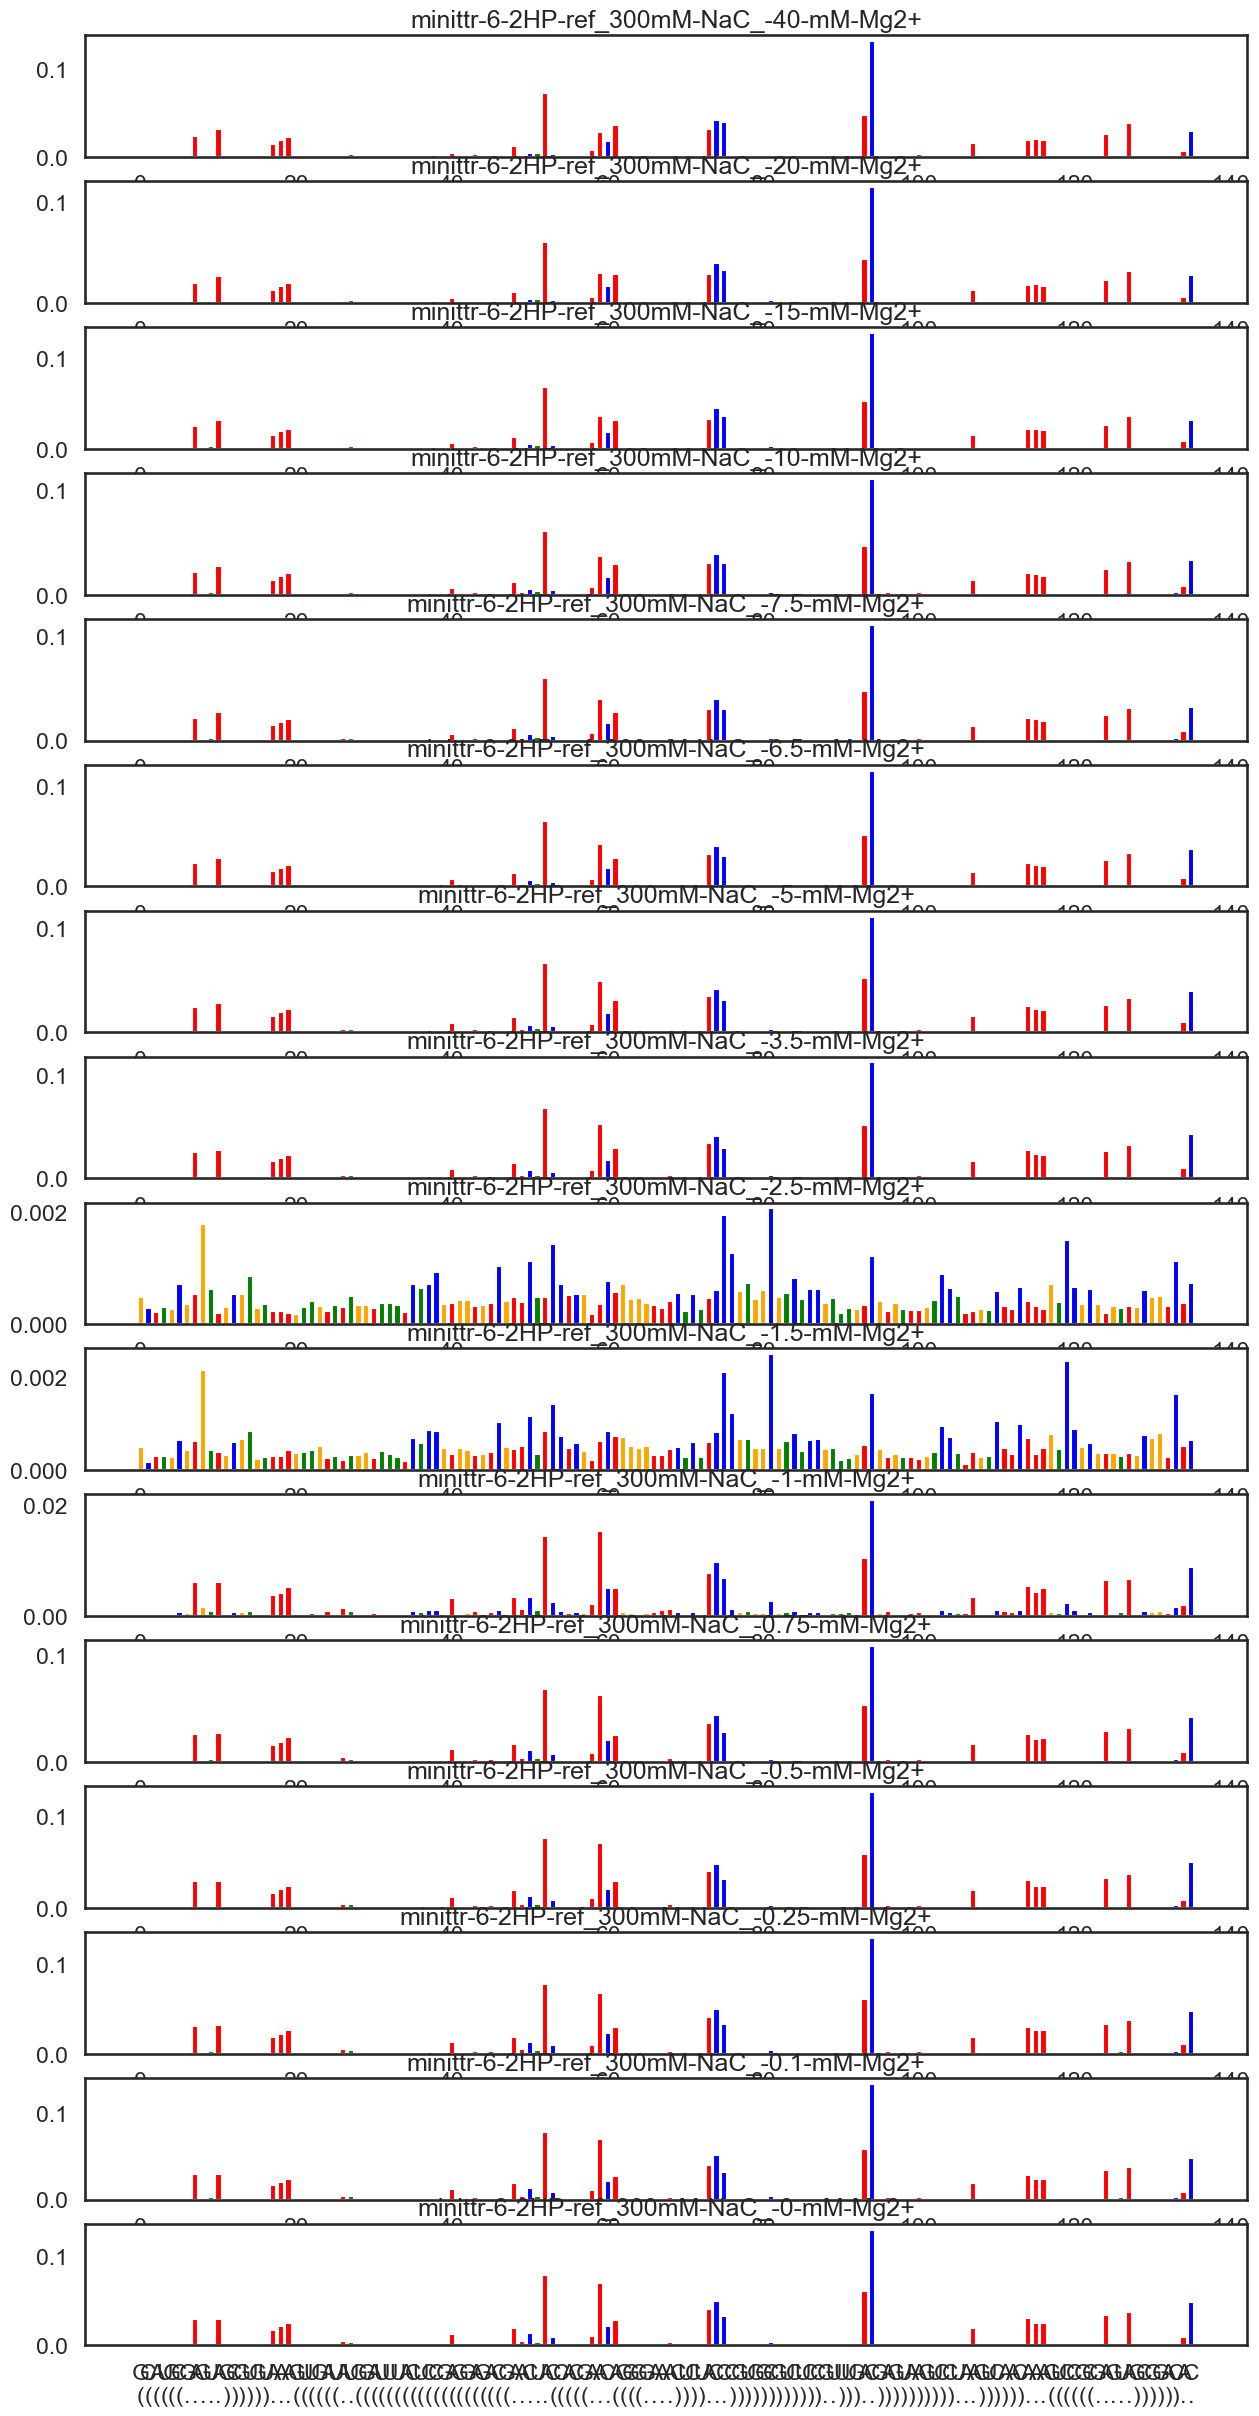

In [7]:
df_sub = df[df["exp_name"] == "2022_08_10_C0117_300mM_NaC_Mg_titra_CM"]
plotting.plot_pop_avg_all(df_sub, figsize=(15, 30))

In [50]:
def normalize_data(data):
    if np.min(data) == np.max(data):
        return data
    return (data - np.min(data)) / (np.max(data) - np.min(data))


def normalize_data_with_max(data, act_max):
    return (data) / (act_max)


def compute_mg_1_2(mg_conc, norm_data ):
    pstart = [1, 1]
    pfit, perr = fit_bootstrap(pstart, mg_conc, norm_data, curve_func_new)
    return pfit, perr


def generate_titration_plot(g, name):
    max_val = 0.025
    mg_conc = list(g["mg_conc"])
    data = list(g["gaaa_avg"])
    norm_data = -normalize_data(np.array(data)) + 1
    r = compute_mg_1_2(mg_conc, norm_data)
    # print(g[["mg_conc", "gaaa_avg"]])
    plt.scatter(g["mg_conc"], norm_data, s=100)
    xs, ys = [], []
    for j in np.arange(0, 40, 0.01):
        p = r[0]
        y = curve_func_new(j, p[0], p[1])
        xs.append(j)
        ys.append(y)
    plt.plot(xs, ys, label=name, lw=3)


def publication_titration_plot(g, name, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
        
    mg_conc = list(g["mg_conc"])
    data = list(g["gaaa_avg"])
    norm_data = -normalize_data(np.array(data)) + 1
    r = compute_mg_1_2(mg_conc, norm_data)
    # print(g[["mg_conc", "gaaa_avg"]])
    plt.scatter(g["mg_conc"], norm_data, s=100)
    xs, ys = [], []
    for j in np.arange(0, 40, 0.01):
        p = r[0]
        y = curve_func_new(j, p[0], p[1])
        xs.append(j)
        ys.append(y)
    plt.plot(xs, ys, label=name, lw=3)

[ 0.92333333  0.92773333  0.9196      0.9288      0.9256      0.90906667
  0.894       0.918       0.8736      0.81346667  0.78426667  0.65293333
  0.44226667  0.13253333 -0.11506667]
[0.95066667 0.95293333 0.948      0.9452     0.94666667 0.9408
 0.93066667 0.9292     0.90813333 0.90333333 0.90213333 0.90706667
 0.8988    ]


/Users/jyesselman2/Dropbox/projects/papers/q_dms_ttr_paper/scripts/analysis/titration_fitting.py:13: RuntimeWarning: invalid value encountered in power
  return ((conc / K) ** n) / (1 + (conc / K) ** n)
/Users/jyesselman2/Dropbox/projects/papers/q_dms_ttr_paper/scripts/analysis/titration_fitting.py:13: RuntimeWarning: divide by zero encountered in power
  return ((conc / K) ** n) / (1 + (conc / K) ** n)
/Users/jyesselman2/Dropbox/projects/papers/q_dms_ttr_paper/scripts/analysis/titration_fitting.py:13: RuntimeWarning: invalid value encountered in divide
  return ((conc / K) ** n) / (1 + (conc / K) ** n)
/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


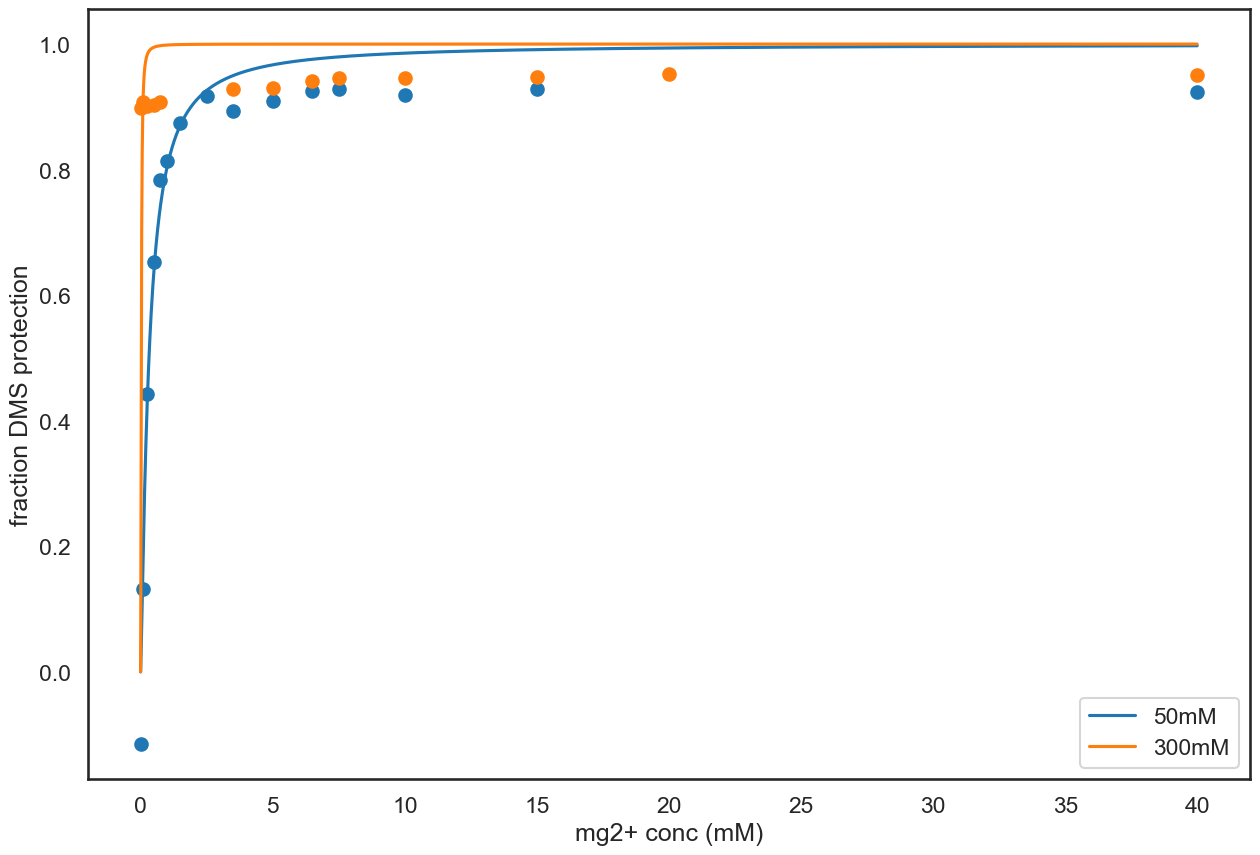

In [9]:
exp_names = [
    ["2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM", "50mM"],
    ["2022_08_10_C0117_300mM_NaC_Mg_titra_CM", "300mM"],
]
for exp in exp_names:
    df_sub = df[df["exp_name"] == exp[0]]
    if exp[0] == "2022_08_10_C0117_300mM_NaC_Mg_titra_CM":
        bad = [1.00, 1.50, 2.50]
        df_sub = df_sub[~df_sub["mg_conc"].isin(bad)]
    generate_titration_plot(df_sub, exp[1])
plt.ylabel("fraction DMS protection")
plt.xlabel("mg2+ conc (mM)")
plt.legend()

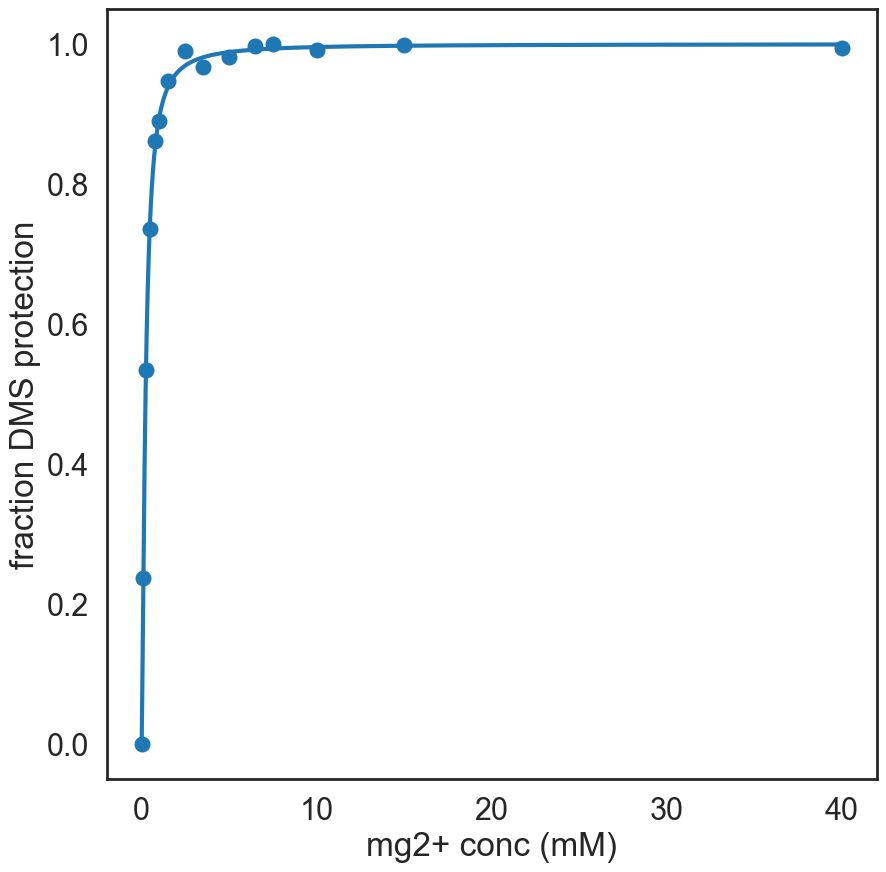

In [49]:
fig, ax = plt.subplots()
exp_names = [
    ["2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM", "50mM"],
]
df = df[df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2"]
for exp in exp_names:
    df_sub = df[df["exp_name"] == exp[0]]
    generate_titration_plot(df_sub, exp[1])
publication_style_ax(ax)
plt.ylabel("fraction DMS protection")
plt.xlabel("mg2+ conc (mM)")
ax.set_box_aspect(1)




In [12]:
df_notlr = pd.read_json("../data/no_tlr_mg.json")

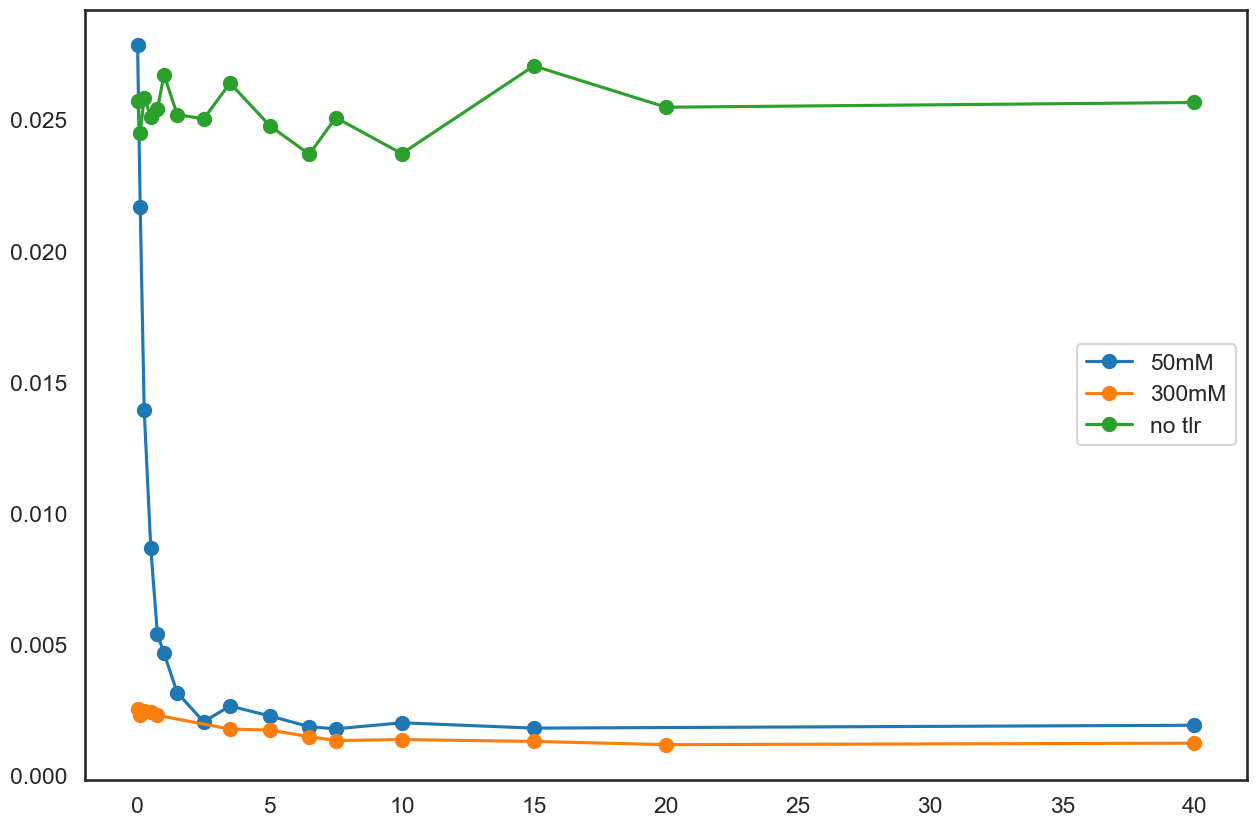

In [13]:
exp_names = [
    ["2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM", "50mM"],
    ["2022_08_10_C0117_300mM_NaC_Mg_titra_CM", "300mM"],
]
for exp in exp_names:
    df_sub = df[df["exp_name"] == exp[0]]
    if exp[0] == "2022_08_10_C0117_300mM_NaC_Mg_titra_CM":
        bad = [1.00, 1.50, 2.50]
        df_sub = df_sub[~df_sub["mg_conc"].isin(bad)]
    plt.plot(df_sub["mg_conc"], df_sub["gaaa_avg"], label=exp[1], marker="o", ms=10)
plt.plot(df_notlr['mg_conc'], df_notlr['gaaa_avg'], label='no tlr', marker='o', ms=10)
plt.legend()

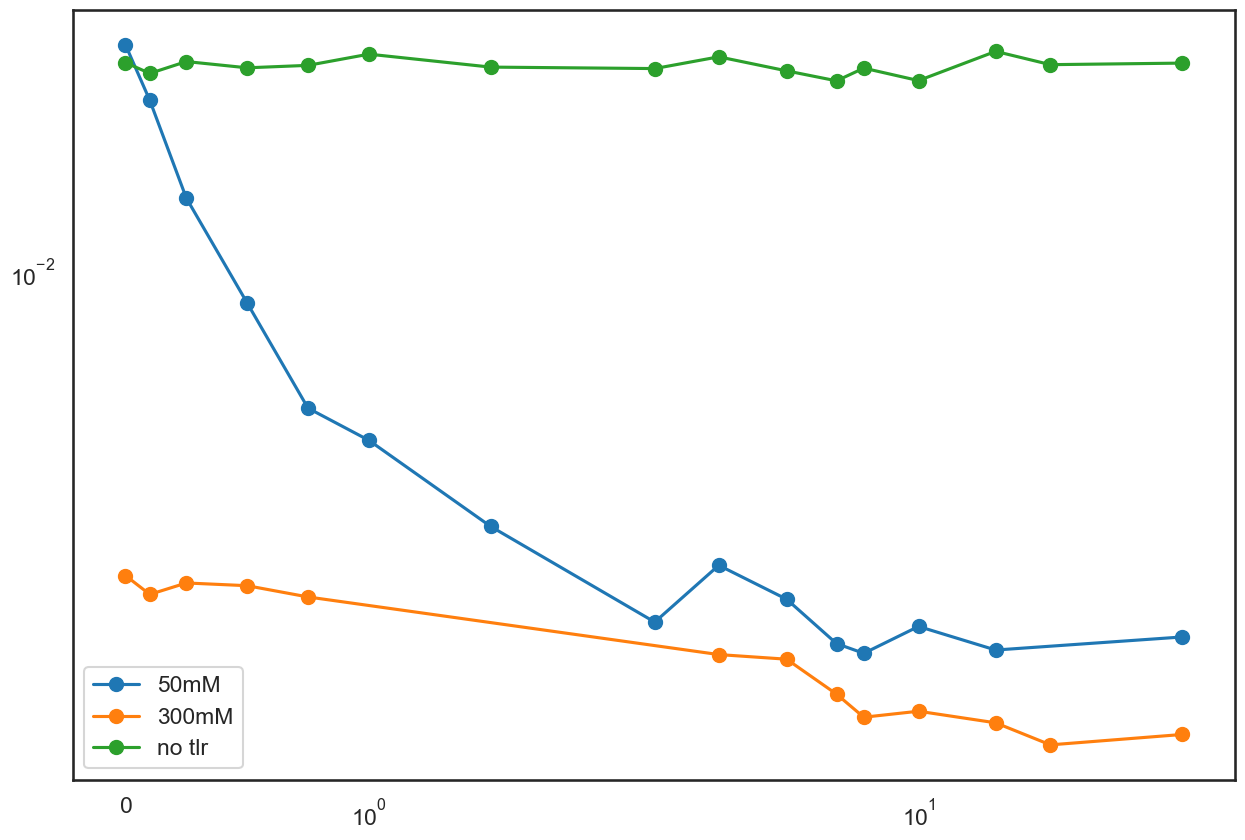

In [14]:
exp_names = [
    ["2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM", "50mM"],
    ["2022_08_10_C0117_300mM_NaC_Mg_titra_CM", "300mM"],
]
for exp in exp_names:
    df_sub = df[df["exp_name"] == exp[0]]
    if exp[0] == "2022_08_10_C0117_300mM_NaC_Mg_titra_CM":
        bad = [1.00, 1.50, 2.50]
        df_sub = df_sub[~df_sub["mg_conc"].isin(bad)]
    plt.plot(df_sub["mg_conc"], df_sub["gaaa_avg"], label=exp[1], marker="o", ms=10)
plt.plot(df_notlr['mg_conc'], df_notlr['gaaa_avg'], label='no tlr', marker='o', ms=10)
plt.legend()
plt.xscale('symlog')
plt.yscale('log')

In [15]:
def plot_res_against_mg2_conc(df, data_col, seq, ax=None):
    if ax is None:
        ax = plt.gca()
    bounds = [0, len(df.iloc[0][data_col])]
    #pal = sns.color_palette("tab10", 11)[::-1]
    #colors = pal
    for i in range(bounds[0], bounds[1]):
        # not DMS active
        seq_pos = seq[i]
        if seq_pos == 'G' or seq_pos == 'U':
            continue
            
        ax.plot(df["mg_conc"], df[data_col].apply(lambda x : x[i]),
                 lw=2, marker='o', markersize=7, 
                 label=str(i) + " " + seq_pos)
    ax.set_xlabel("mg_conc")
    ax.set_ylabel("normalized_reactivity")


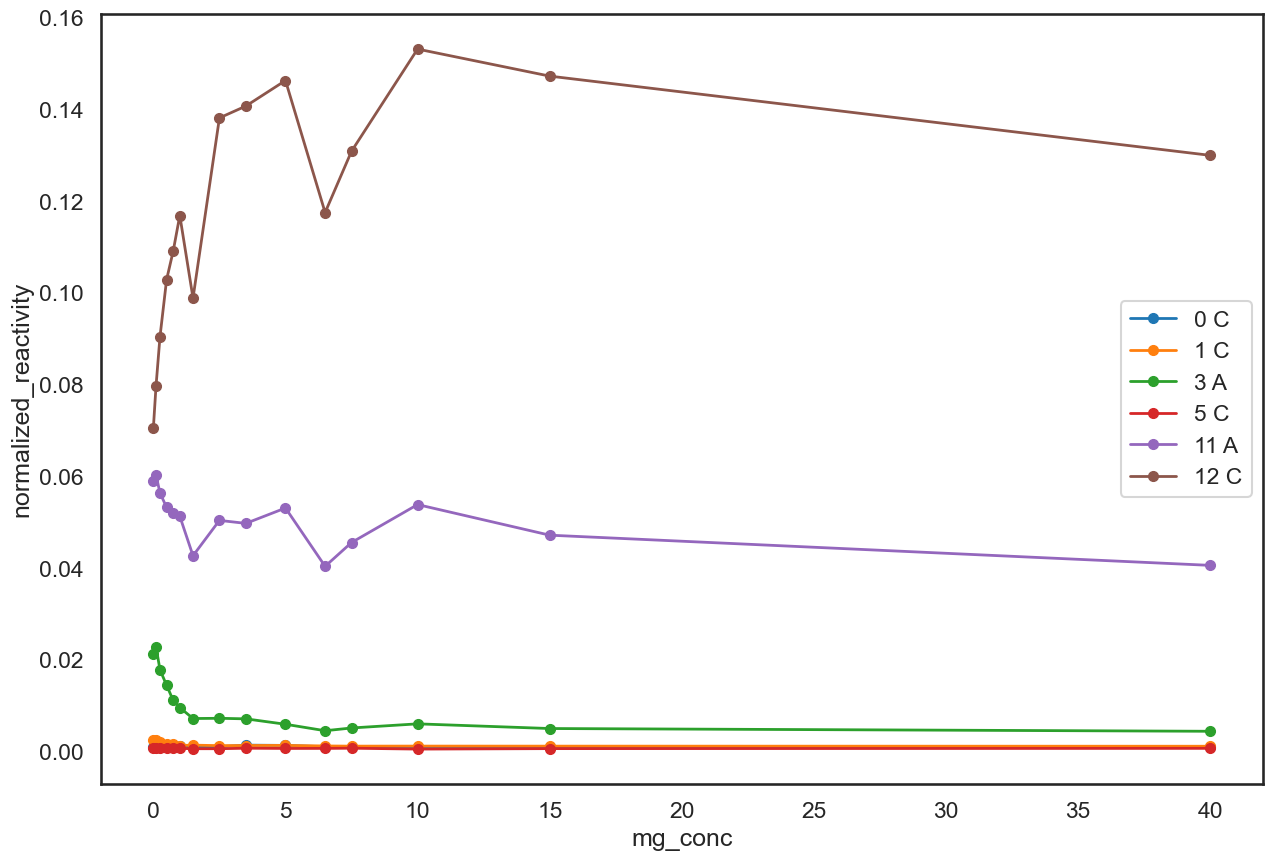

In [16]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
plot_res_against_mg2_conc(df_sub, "kink_turn", "CCGAGCGUUUGACG")
plt.legend()

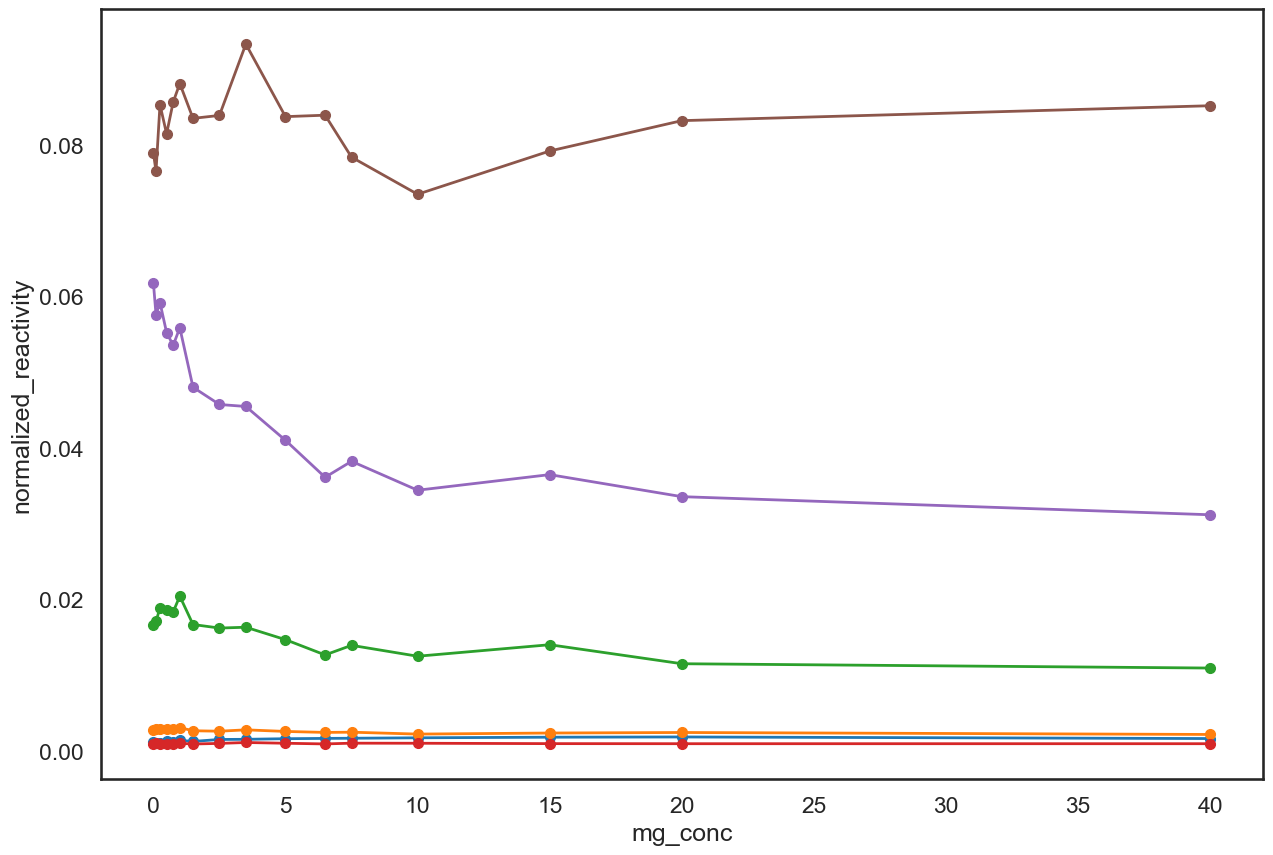

In [17]:
plot_res_against_mg2_conc(df_notlr, "kink_turn", "CCGAGCGUUUGACG")

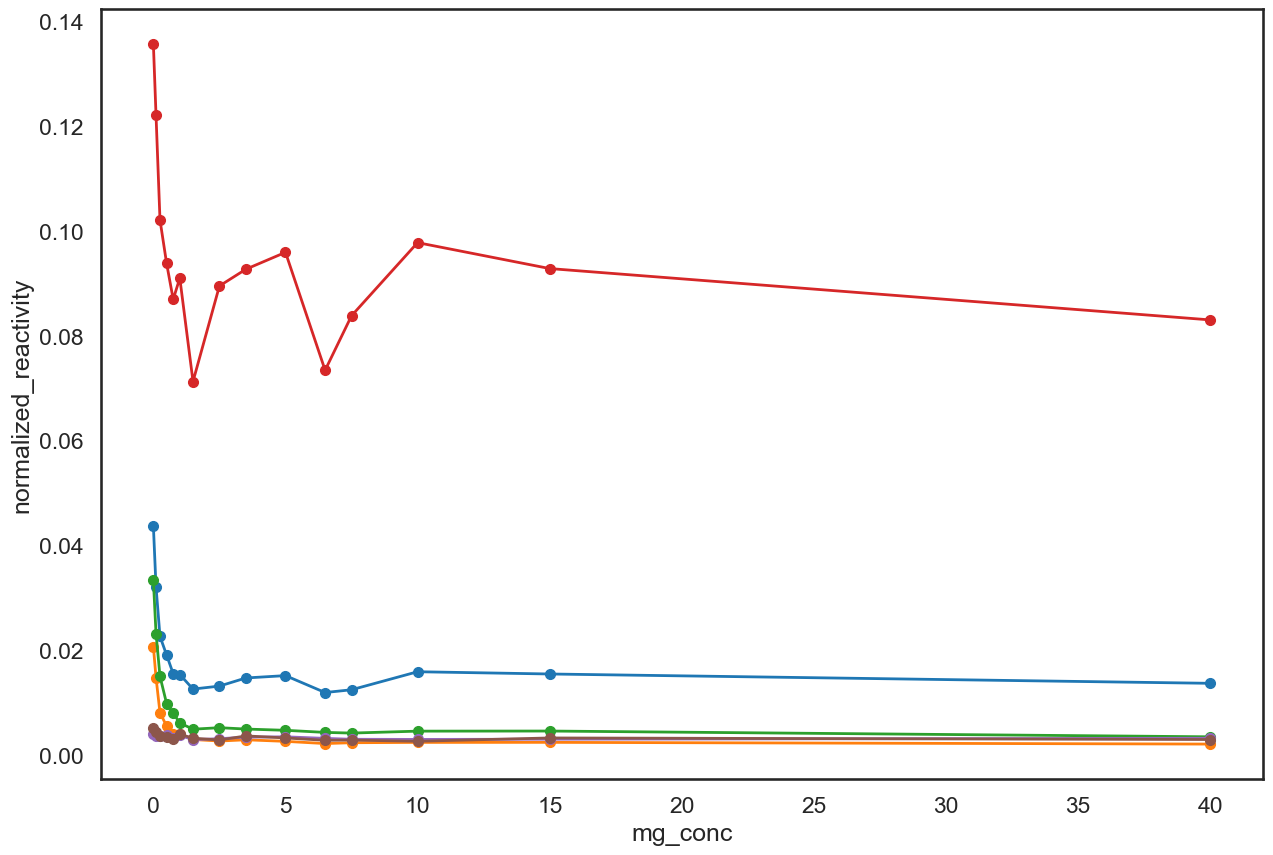

In [18]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
plot_res_against_mg2_conc(df_sub, "ires", "GAACUACGC")

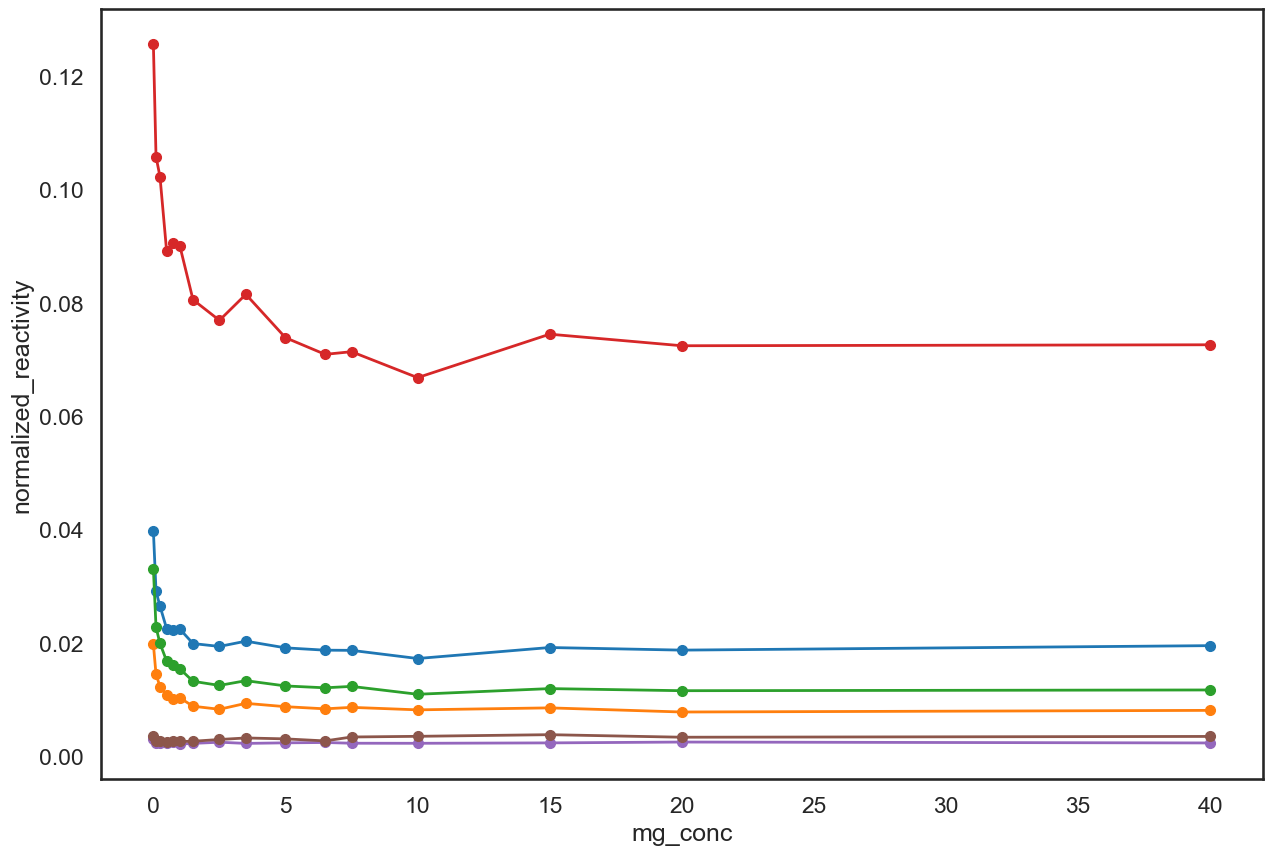

In [19]:
plot_res_against_mg2_conc(df_notlr, "ires", "GAACUACGC")

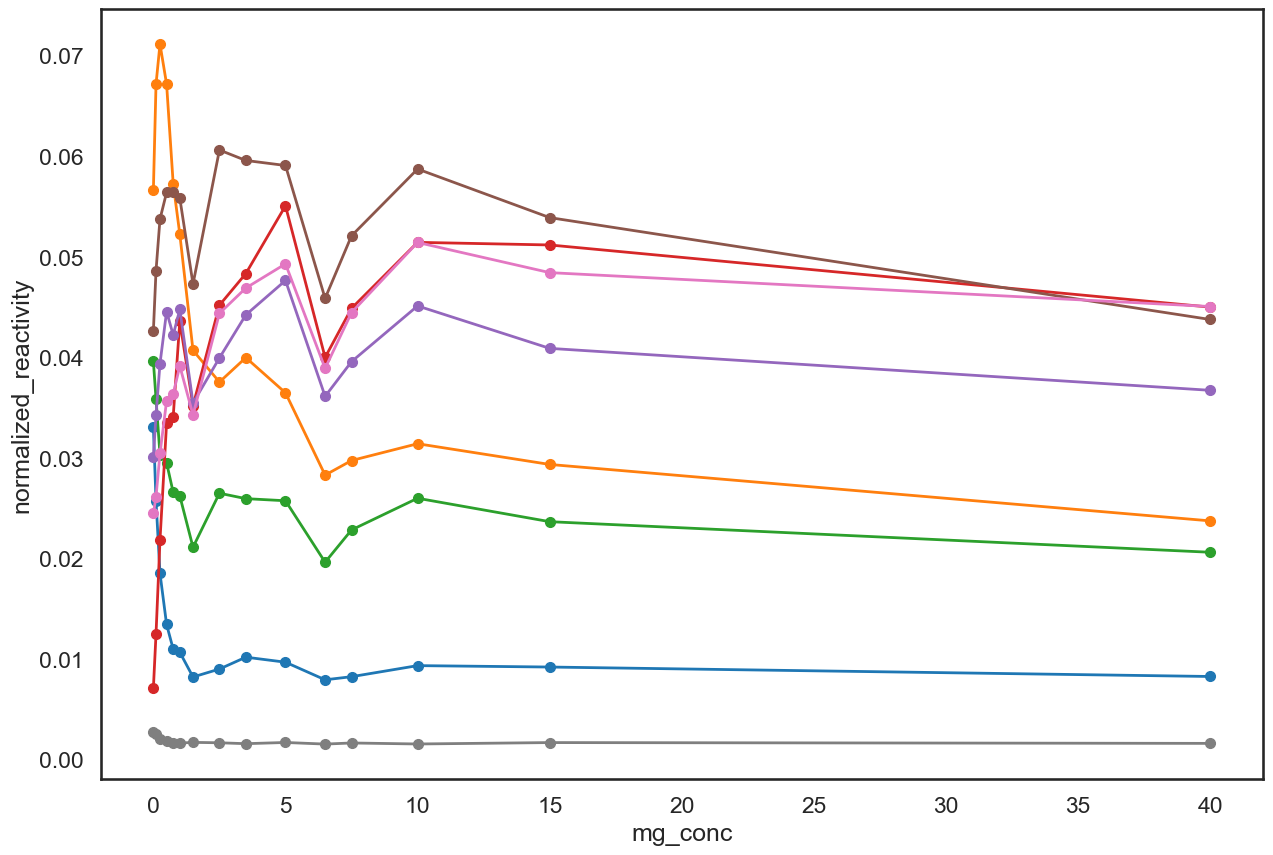

In [20]:
q1 = df["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"
df_sub = df[q1]
plot_res_against_mg2_conc(df_sub, "3x3_motif", "GAACAUACCC")

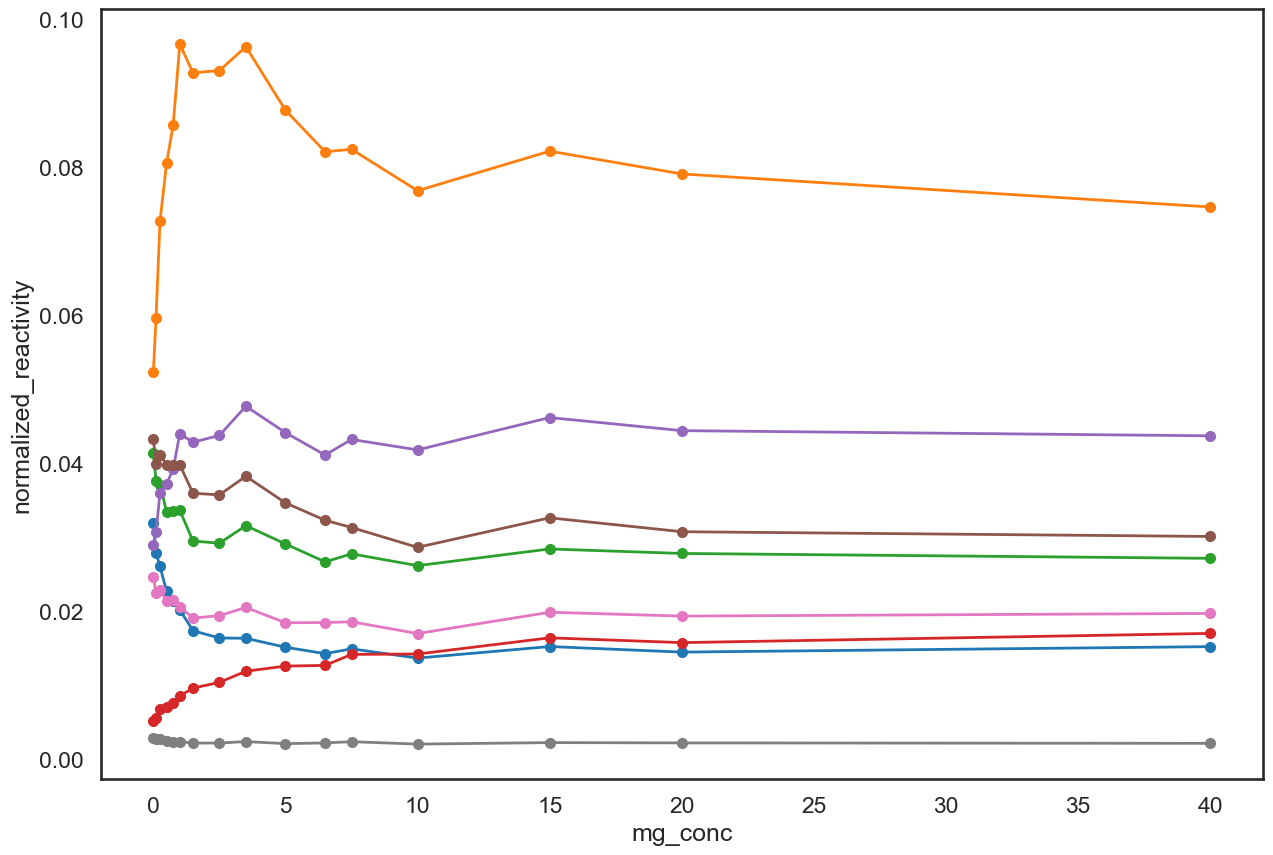

In [21]:
plot_res_against_mg2_conc(df_notlr, "3x3_motif", "GAACAUACCC")

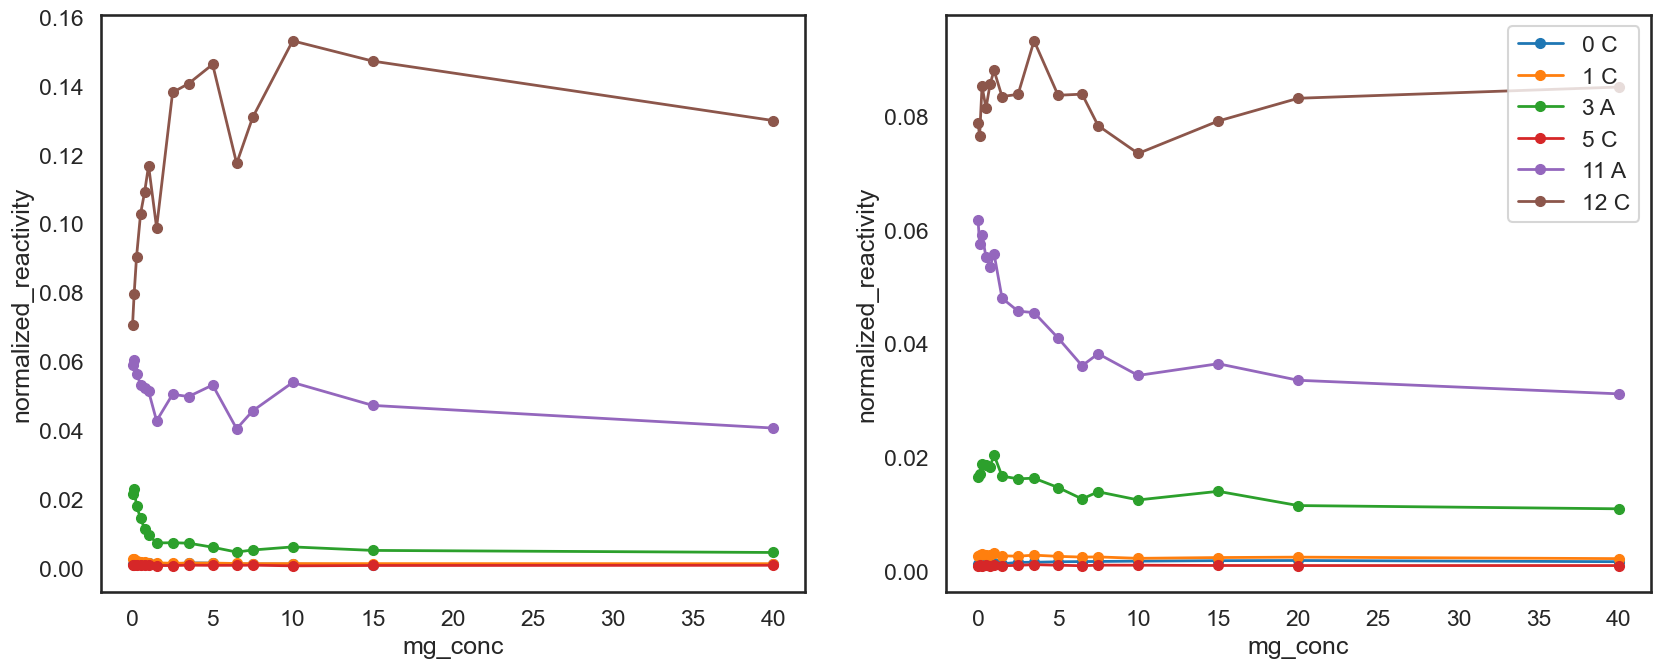

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7.5))
plot_res_against_mg2_conc(df_sub, "kink_turn", "CCGAGCGUUUGACG", ax[0])
plot_res_against_mg2_conc(df_notlr, "kink_turn", "CCGAGCGUUUGACG", ax[1])
plt.legend()


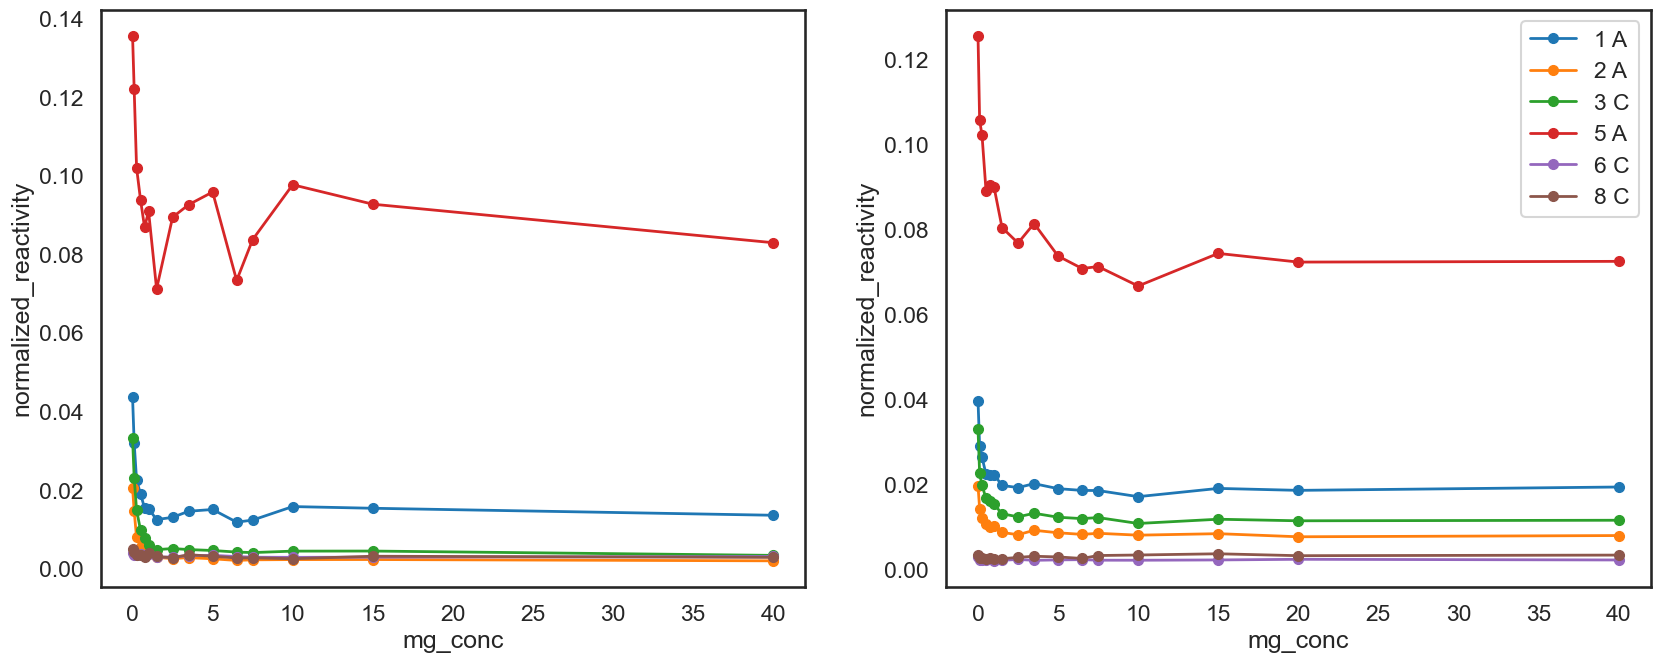

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7.5))
plot_res_against_mg2_conc(df_sub, "ires", "GAACUACGC", ax[0])
plot_res_against_mg2_conc(df_notlr, "ires", "GAACUACGC", ax[1])
plt.legend()


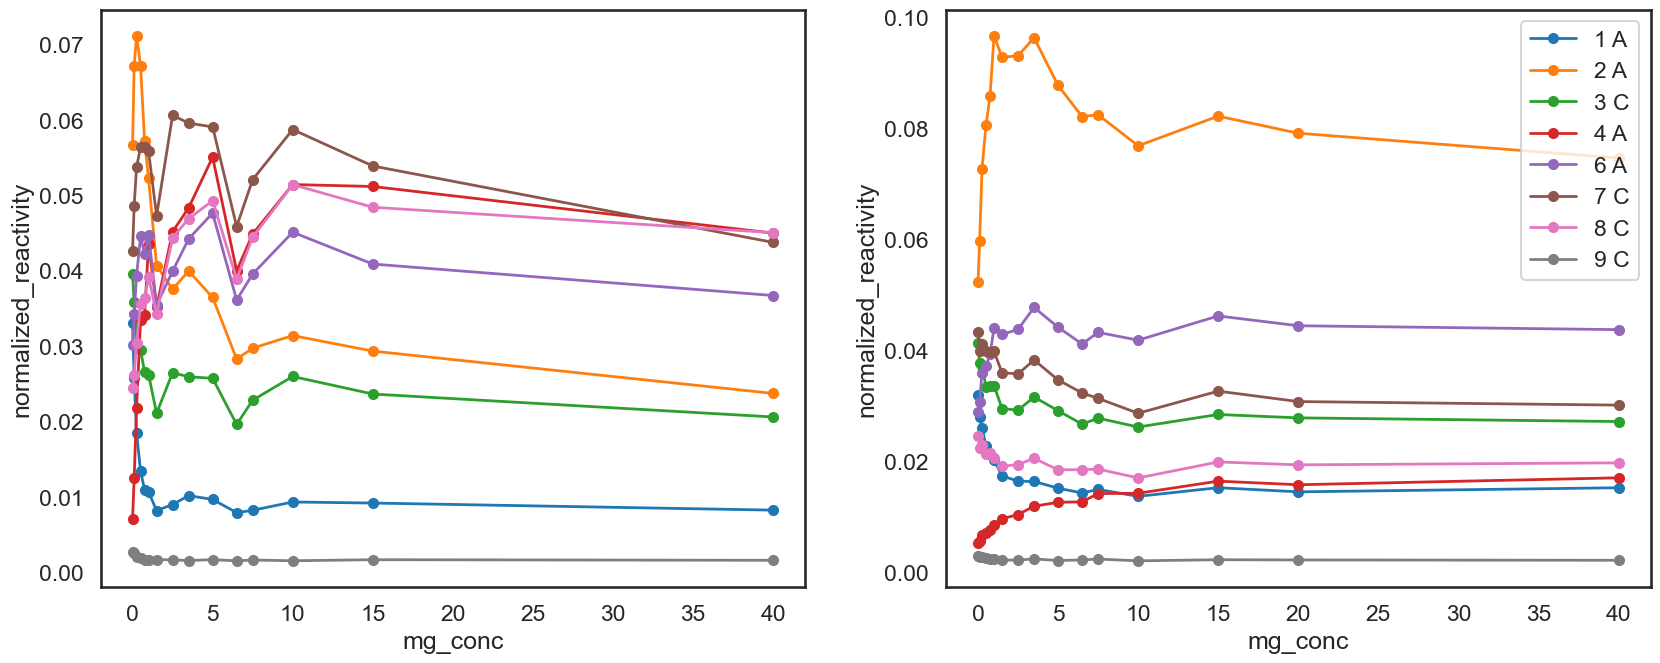

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7.5))
plot_res_against_mg2_conc(df_sub, "3x3_motif", "GAACAUACCC", ax[0])
plot_res_against_mg2_conc(df_notlr, "3x3_motif", "GAACAUACCC", ax[1])
plt.legend()
